In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [44]:
#reading the data
df = pd.read_excel(r"C:\Users\DELL\Desktop\Data Science\Files\loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [45]:
#assigning x and y
x = df.iloc[:,df.columns != 'Decision']
y =df['Decision']

In [46]:
x.shape

(429, 13)

In [47]:
x.columns

Index(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Occupation', 'Job_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance'],
      dtype='object')

In [48]:
#processing the dataset
le = preprocessing.LabelEncoder()

In [49]:
X = x.apply(le.fit_transform)
X.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,1,242,17,0,0,11,6,0,0,0,0,37,0
1,1,31,130,1,1,4,0,0,0,1,0,34,0
2,0,248,162,0,0,0,2,5,13,0,0,0,136
3,1,59,61,1,1,0,0,2,0,0,0,0,0
4,1,119,154,0,0,1,0,0,0,0,0,63,0


In [50]:
#OneHotEncoder
enc = preprocessing.OneHotEncoder()

#fit
enc.fit(X)

# transform
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape

(429, 812)

In [51]:
onehotlabels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [52]:
#checking for missing value
df.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [53]:
df.shape

(429, 14)

In [54]:
df = df.drop(['Sex'],axis=1)
df.shape

(429, 13)

In [55]:
df=df.drop(['Telephone'],axis=1)
df.shape

(429, 12)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(onehotlabels,y, random_state=0)

In [64]:
model = LogisticRegression(solver='lbfgs',random_state=0)

In [65]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [67]:
p_value = model.predict(onehotlabels)
p_value

array(['reject', 'reject', 'accept', 'accept', 'reject', 'reject',
       'accept', 'accept', 'reject', 'reject', 'accept', 'reject',
       'reject', 'accept', 'accept', 'reject', 'accept', 'reject',
       'reject', 'accept', 'accept', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'accept', 'accept', 'reject',
       'reject', 'reject', 'accept', 'accept', 'reject', 'reject',
       'reject', 'reject', 'reject', 'accept', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'reject',
       'reject', 'reject', 'reject', 'accept', 'accept', 'accept',
       'reject', 'reject', 'reject', 'reject', 'accept', 'reject',
       'reject', 'accept', 'accept', 'accept', 'reject', 'accept',
       'reject', 'accept', 'reject', 'accept', 'accept', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'accept',
       'accept', 'accept', 'reject', 'accept', 'reject', 'reject',
       'reject', 'accept', 'accept', 'accept', 'reject', 'reje

In [68]:
corr = df.corr()
corr

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
Age,1.000000,0.217342,0.426890,0.208736,-0.072254,0.101819
Time_at_address,0.217342,1.000000,0.278849,0.202083,-0.267470,0.072235
Time_employed,0.426890,0.278849,1.000000,0.291542,-0.110933,0.112719
Time_bank,0.208736,0.202083,0.291542,1.000000,-0.111761,0.153435
Home_Expn,-0.072254,-0.267470,-0.110933,-0.111761,1.000000,0.080366
Balance,0.101819,0.072235,0.112719,0.153435,0.080366,1.000000


In [69]:
r_sq = model.score(onehotlabels, y)
r_sq

0.9067599067599068

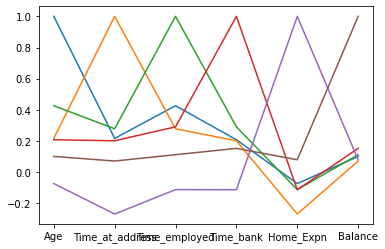

In [85]:
plt.plot(corr)


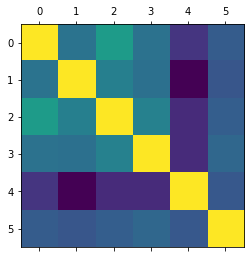

In [87]:
plt.matshow(corr)
plt.show()